## Introduction 
* Diabetes is a chronic (long-lasting) health condition that affects how your body turns food into energy. 
* Most of the food you eat is broken down into sugar (also called glucose) and released into your bloodstream.

### Goals
* I am classified diabetic patients by using several ML models.

#### Machine Learning Models

* SVM
* Navie Bayesian
* Random Forest 


### Dataset Informations
* **Name:** [Pima Indians Diabetes Database](https://www.kaggle.com/uciml/pima-indians-diabetes-database)
* **Feautres:** 9 clinical features for prediction 



## Libraries

In [1]:
import pandas as pd
import numpy as np


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 
from chart_studio import plotly  as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go

In [3]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score ,confusion_matrix

<a id ="1"></a><br>
# Read and Examination Dataset

In [10]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
positive = data[data.Outcome == 1]
negative = data[data.Outcome == 0]


<a id ="2"></a><br>
### Basic Visualization

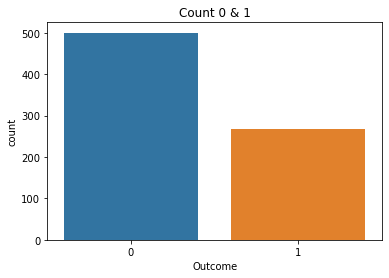

In [23]:
sns.countplot(x='Outcome',data=data)
plt.title("Count 0 & 1")
plt.show()

<a id ="3"></a><br>
# Exploratory Data Analysis

In [16]:
print('Data Shape',data.shape)
print(data.info()) 
describe = data.describe()
describe

Data Shape (768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<a id ="4"></a><br>
# Co-Relation Of Features

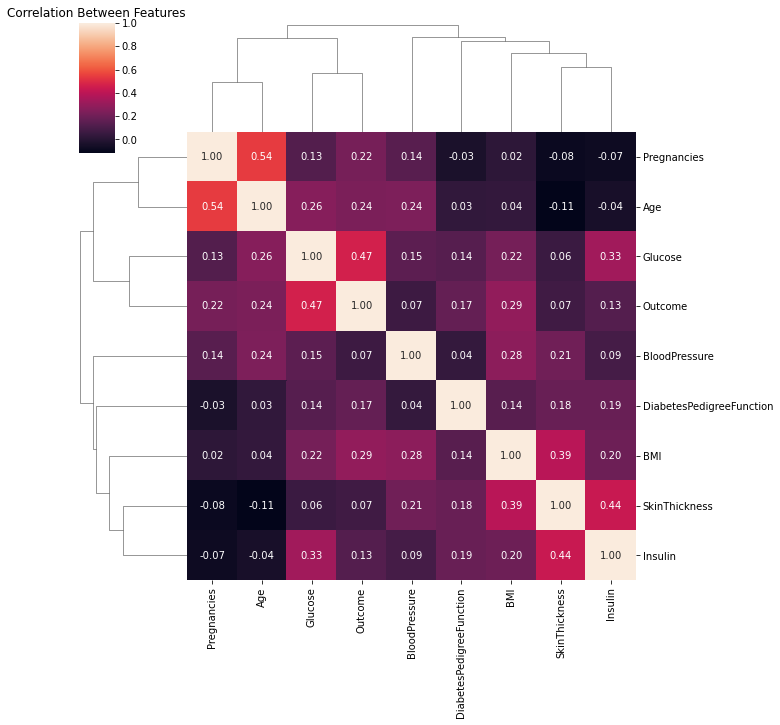

In [25]:
corr_data = data.corr() 
sns.clustermap(corr_data,annot= True,fmt = '.2f')
plt.title('Correlation Between Features')
plt.show()

In [26]:
x = data.drop(['Outcome'],axis=1) 
y = data.Outcome

<a id ="9"></a><br>
# Train Test Split & Standardization Processing

In [205]:
test_size = 0.3

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=test_size,random_state=42)

In [206]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


<a id ="11"></a><br>
# Machine Learning Models

<a id ="14"></a><br>
## Support Vector Machine (SVM)

In [207]:
from sklearn.svm import SVC

SVM = SVC(random_state=42)

In [208]:
from sklearn.model_selection import cross_val_score
accuraccies = cross_val_score(estimator = SVM, X= x_train, y=y_train, cv=5)
print("Average Accuracies: ",np.mean(accuraccies))
print("Standart Deviation Accuracies: ",np.std(accuraccies))

Average Accuracies:  0.7671512634129456
Standart Deviation Accuracies:  0.017594565380862737


In [209]:
SVM.fit(x_train,y_train)  

print ("SVM Accuracy:", SVM.score(x_test,y_test))

SVMscore = SVM.score(x_test,y_test)

SVM Accuracy: 0.7445887445887446


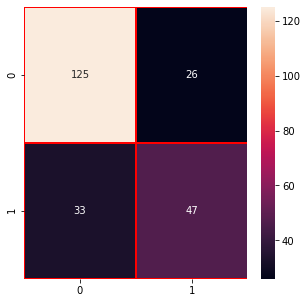

In [210]:
svmprediction= SVM.predict(x_test)
ytrue = y_test

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue,svmprediction)


f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel
plt.show()

<a id ="15"></a><br>
# Naive Bayes (NB)

In [211]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()

In [212]:
from sklearn.model_selection import cross_val_score
accuraccies = cross_val_score(estimator = NB, X= x_train, y=y_train, cv=35)
print("Average Accuracies: ",np.mean(accuraccies))
print("Standart Deviation Accuracies: ",np.std(accuraccies))

Average Accuracies:  0.7596428571428572
Standart Deviation Accuracies:  0.0817878803345246


In [213]:
NB.fit(x_train,y_train)
print("Accuracy of NB Score: ", NB.score(x_test,y_test))

NBscore= NB.score(x_test,y_test)

Accuracy of NB Score:  0.7445887445887446


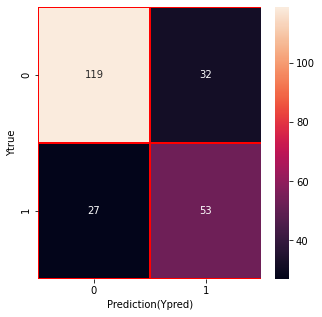

In [214]:
nbprediction= NB.predict(x_test)
ytrue = y_test

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue,nbprediction)



f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()

<a id ="17"></a><br>
# Random Forest

In [215]:

from sklearn.ensemble import RandomForestClassifier
RFC= RandomForestClassifier(n_estimators = 82, random_state=42)

In [216]:
from sklearn.model_selection import cross_val_score
accuraccies = cross_val_score(estimator = RFC, X= x_train, y=y_train, cv=10)
print("Average Accuracies: ",np.mean(accuraccies))
print("Standart Deviation Accuracies: ",np.std(accuraccies))

Average Accuracies:  0.7651642208245982
Standart Deviation Accuracies:  0.052403551779101866


In [217]:
RFC.fit(x_train,y_train)
print("Random Forest Score: ",RFC.score(x_test,y_test))
RFCscore=RFC.score(x_test,y_test)

Random Forest Score:  0.7359307359307359


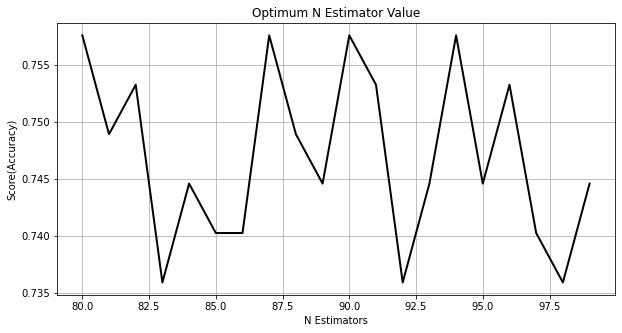

In [218]:
scores = []
for each in range(80,100):
    RFfind = RandomForestClassifier(n_estimators = each)
    RFfind.fit(x_train,y_train)
    scores.append(RFfind.score(x_test,y_test))
    
plt.figure(1, figsize=(10, 5))
plt.plot(range(80,100),scores,color="black",linewidth=2)
plt.title("Optimum N Estimator Value")
plt.xlabel("N Estimators")
plt.ylabel("Score(Accuracy)")
plt.grid(True)
plt.show()

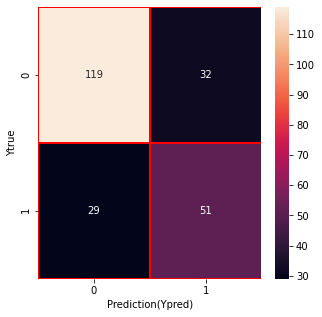

In [219]:
rfcprediction= RFC.predict(x_test)
ytrue = y_test

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue,rfcprediction)





f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()

# Ensembled model

In [220]:
from sklearn.ensemble import VotingClassifier

In [221]:

model=VotingClassifier([('SVM',SVM),('NB',NB),('RFC',RFC)])
model.fit(x_train,y_train)
EMscore=model.score(x_test,y_test)

In [222]:
EMpredict=model.predict(x_test)

<a id ="20"></a><br>
# Evaluation of Results

In [223]:
from sklearn.metrics import f1_score

In [224]:
SVMf1=f1_score(ytrue, svmprediction, average='weighted') 
SVMf1

0.7416390111992625

In [225]:
NBf1 = f1_score(ytrue,nbprediction, average='weighted') 
NBf1

0.7463086857026251

In [226]:
RFf1=f1_score(ytrue, rfcprediction, average='weighted') 
RFf1

0.7370360589885796

In [227]:
EMf1=f1_score(ytrue,EMpredict, average='weighted') 
EMf1

0.7512762534302936

In [228]:
scores=[SVMscore,NBscore,RFCscore,EMscore]
AlgorthmsName=["SVM","Naive Bayes","Random Forest","ENSEMBLED MODEL"]


trace1 = go.Scatter(
    x = AlgorthmsName,
    y= scores,
    name='Algortms Name',
    marker =dict(color='rgba(0,255,0,0.5)',
               line =dict(color='rgb(0,0,0)',width=2)),
                text=AlgorthmsName
)
data = [trace1]


layout = go.Layout(barmode = "group",
                  xaxis= dict(title= 'ML Algorithms',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Prediction Scores',ticklen= 5,zeroline= False))
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [229]:
scoresf1=[SVMf1,NBf1,RFf1,EMf1]


trace1 = go.Scatter(
    x = AlgorthmsName,
    y= scoresf1,
    name='Algortms Name',
    marker =dict(color='rgba(225,126,0,0.5)',
               line =dict(color='rgb(0,0,0)',width=2)),
                text=AlgorthmsName
)
data = [trace1]

layout = go.Layout(barmode = "group", 
                  xaxis= dict(title= 'ML Algorithms',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Prediction Scores(F1)',ticklen= 5,zeroline= False))
fig = go.Figure(data = data, layout = layout)
iplot(fig)